In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

In [66]:
#Load The Dataset
dataset = pd.read_csv('E:/STUDY/4_2/Neural Network/Lab/Dataset/abalone/abalone.data', sep=',', header=None)
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

#Joining the column names
dataset.columns = column_names

In [67]:
# Initial Overview of The Dataset

print(dataset.head())
print(dataset.describe())


  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
            Length     Diameter       Height  WholeWeight  ShuckedWeight  \
count  4177.000000  4177.000000  4177.000000  4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516     0.828742       0.359367   
std       0.120093     0.099240     0.041827     0.490389       0.221963   
min       0.075000     0.055000     0.000000     0.002000       0.001000   
25%    

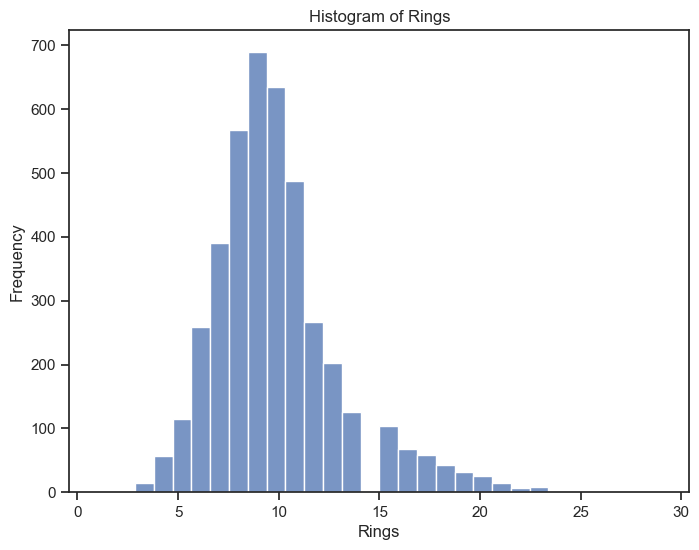

In [68]:
# Example: Histogram of the 'Rings' column
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Rings', bins=30)
plt.title('Histogram of Rings')
plt.xlabel('Rings')
plt.ylabel('Frequency')
plt.show()

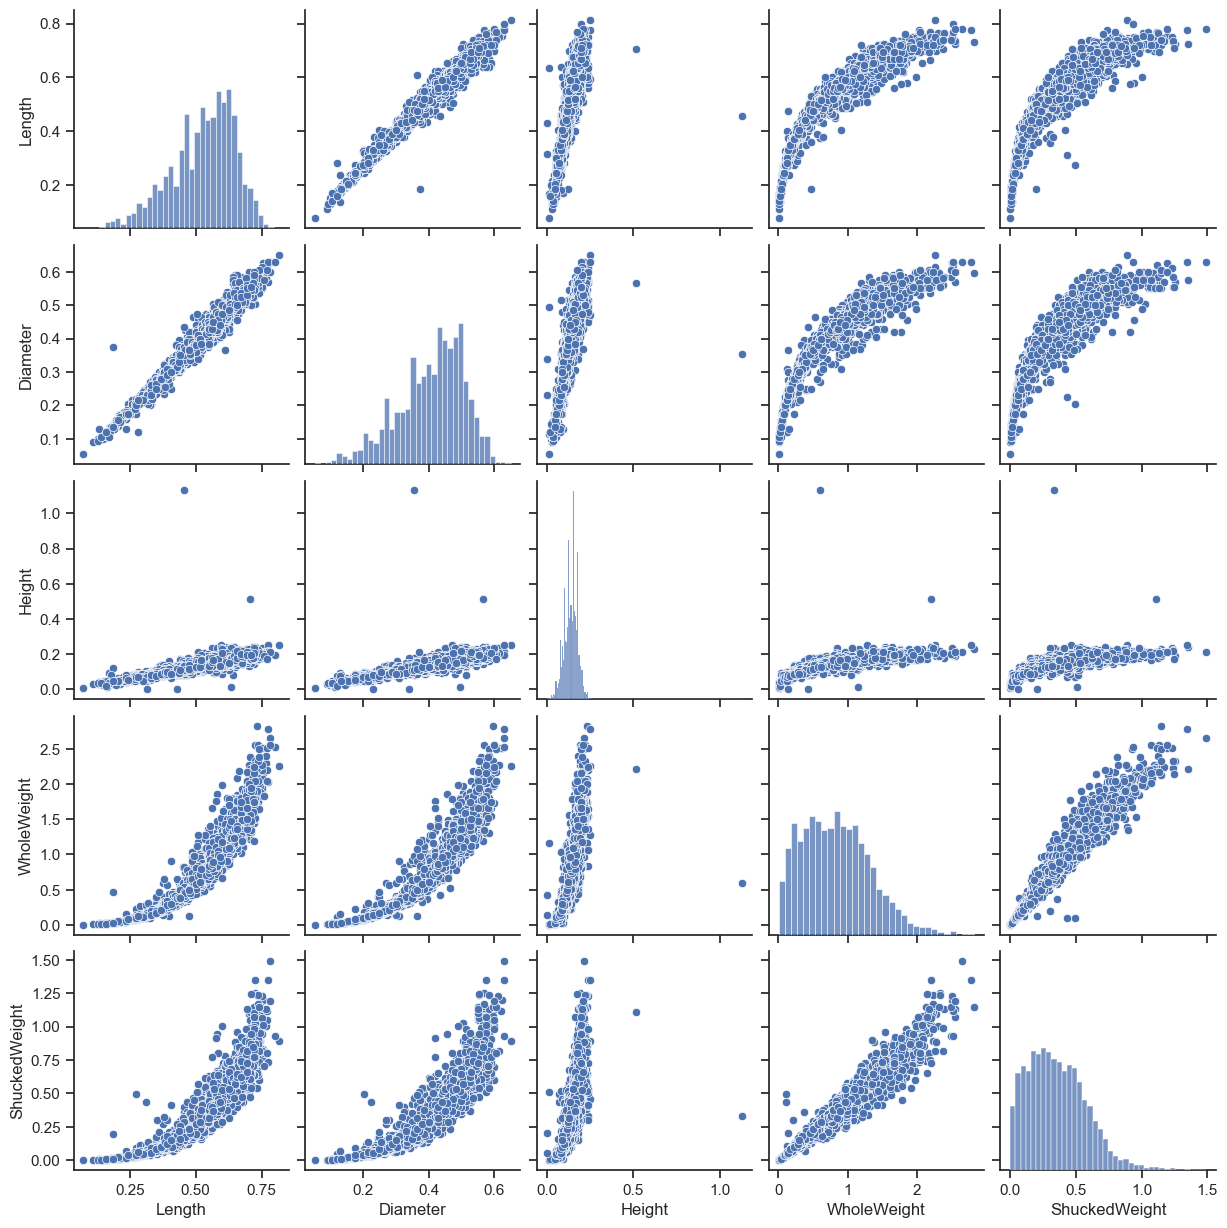

In [69]:
# Select The Numeric Coloumns 
#Pairplot
numeric_columns_subset = dataset[['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight']]

sns.pairplot(numeric_columns_subset)
plt.show()


In [70]:
# Check for missing values
missing_values = dataset.isna().sum()
print(missing_values)


Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


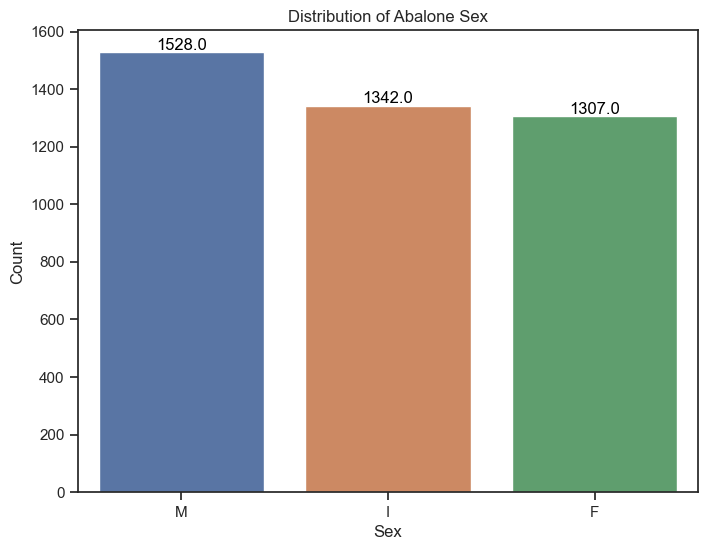

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sex_counts = dataset['Sex'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Abalone Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



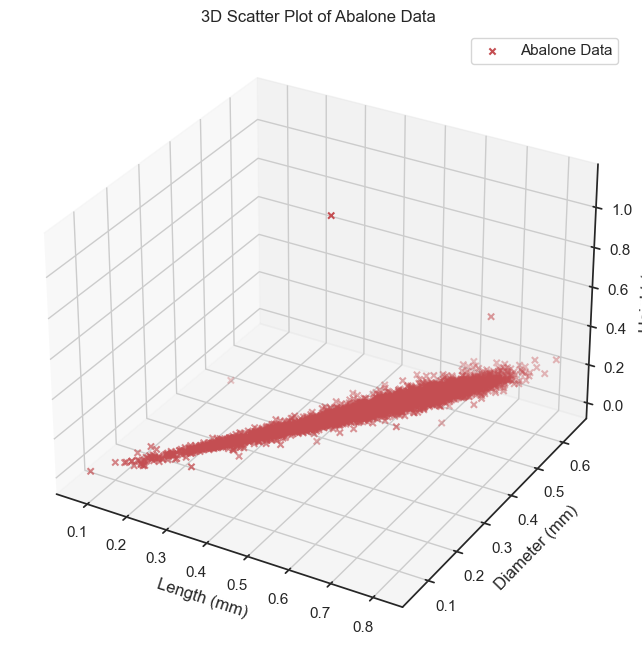

In [72]:
# Create a 3D scatter plot for 'Length', 'Diameter', and 'Height'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


x = dataset['Length']
y = dataset['Diameter']
z = dataset['Height']


ax.scatter(x, y, z, c='r', marker='x', label='Abalone Data')


ax.set_xlabel('Length (mm)')
ax.set_ylabel('Diameter (mm)')
ax.set_zlabel('Height (mm)')


ax.set_title('3D Scatter Plot of Abalone Data')


ax.legend()


plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_1964\3363947198.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


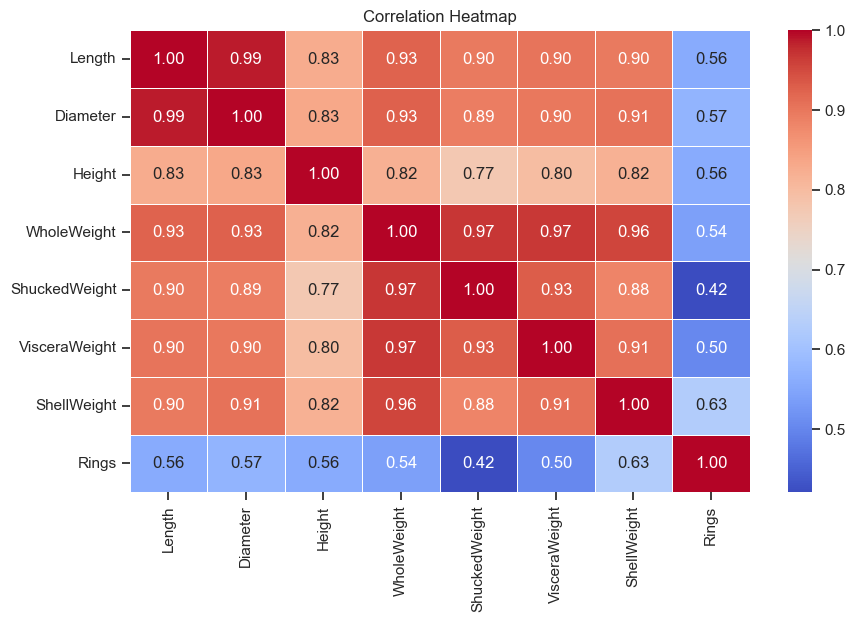

In [73]:
# correlation matrix
correlation_matrix = dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [82]:
#Keeping Only the 4 Classes

top_n_classes = 4
class_counts = dataset['Rings'].value_counts()
top_n_classes = class_counts.head(top_n_classes).index.tolist()
dataset['NewClass'] = dataset['Rings'].apply(lambda x: x if x in top_n_classes else 'Other')

dataset2 = dataset[dataset['NewClass'] != 'Other']